In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TRAINING_SET_PATH = './News/News/train.csv'
TEST_SET_PATH = './News/News/test.csv'

In [3]:
import re
from bidi.algorithm import get_display
from arabic_reshaper import reshape

class DataPreprocessor:
    def __init__(self, path, is_test_set=0):
        self.categories = None
        self.is_test_set = is_test_set
        self.wordToIndex = None
        self.indexToWord = None
        self.X, self.y = self.read_data(path)
        self.clean_text()
        self.count_words()
        self.map_word_index()

    def read_data(self, path):
        df1 = pd.read_csv(path, delimiter='\t')
        df1 = df1.dropna()
        self.categories = df1['category'].value_counts().index.to_list()[:-1]
        df1 = df1[df1['category'].isin(self.categories)]
        array = df1.values
        x = []
        y = []
        for i in range(array.shape[0]):
            x.append(str(array[i,1]) + ' ' + str(array[i,5]))
            y.append(array[i,3])
           
        return x,y
     
    def plot_distribution(self):
        category_counts = pd.Series(self.y).value_counts()
        categories = self.categories
        number_of_categories = category_counts.to_list()
        persian_categories = [get_display(reshape(cat)) for cat in categories]
        plt.rcParams['font.family'] = 'Yas'
        plt.figure(figsize=(10,10), dpi=100)
        plt.bar(persian_categories, number_of_categories)
        plt.show()

    def clean_text(self):
        for i in range(len(self.X)):
            self.X[i] = re.sub(r'[^۰-۹آ-ی\s]', '', self.X[i])
            self.X[i] = re.sub(r'[۰-۹]+','N', self.X[i])
            self.X[i] = self.X[i].replace(u'\xa0', u'')

    def count_words(self):
        self.X = list(map(lambda x: x.split(), self.X))
        frequencies = {}
        n_tokens = 0
        for x in self.X:
            for token in x:
                if token in frequencies:
                    frequencies[token] += 1
                else:
                    frequencies[token] = 1
                n_tokens += 1

        frequencies_pair_list = list(frequencies.items())
        frequencies_pair_list.sort(key=lambda x: x[1], reverse=True) 

        if not self.is_test_set:
            with open('frequent.txt', 'w', encoding='utf-8') as f:
                most_frequencies_list = frequencies_pair_list[0:200]
                tokens_string = ''
                for token,value in most_frequencies_list:
                    tokens_string += token + ' ' + str(value) + '\n'
                f.write(tokens_string)

        self.frequencies_dict = dict(frequencies_pair_list)
        print('number of unique tokens: ', len(frequencies_pair_list))
        print('number of tokens: ', n_tokens)

    def map_word_index(self):
        wordToIndex = {}
        indexToWord = {}
        index = 0
        for token in self.frequencies_dict:
            wordToIndex[token] = index
            indexToWord[index] = token
            index+=1

        if not self.is_test_set:
            with open('wordToIndex.txt', 'w', encoding='utf-8') as f:
                indexToWord_list =list(indexToWord.items())[0:200]
                tokens_string = ''
                for index,word in indexToWord_list:
                    tokens_string += word + ' ' + str(index) + '\n'
                f.write(tokens_string)

        self.wordToIndex = wordToIndex
        self.indexToWord = indexToWord 
        return str(20) + ' ' + indexToWord[20] + '\n' + str(30) + ' ' + indexToWord[30] + '\n' + str(50) + ' ' + indexToWord[50]
    
    def tokenize(self, sentence):
        indices = []
        for token in sentence:
            indices.append(self.wordToIndex[token])
        return indices

print("=====Training set=====")
dp_train = DataPreprocessor(TRAINING_SET_PATH)
print('===== Test set =====')
dp_test = DataPreprocessor(TEST_SET_PATH, is_test_set=1)

=====Training set=====
number of unique tokens:  414534
number of tokens:  31974762
===== Test set =====
number of unique tokens:  137155
number of tokens:  5778816


In [4]:
pd.Series(dp_train.y).value_counts()

بین‌الملل      22767
ورزشی          14274
سیاسی          13647
فرهنگی هنری    12136
اجتماعی        11069
علمی پزشکی      9938
اقتصادی         9583
فضای مجازی      1936
وب‌گردی         1297
فیلم و صوت       375
dtype: int64

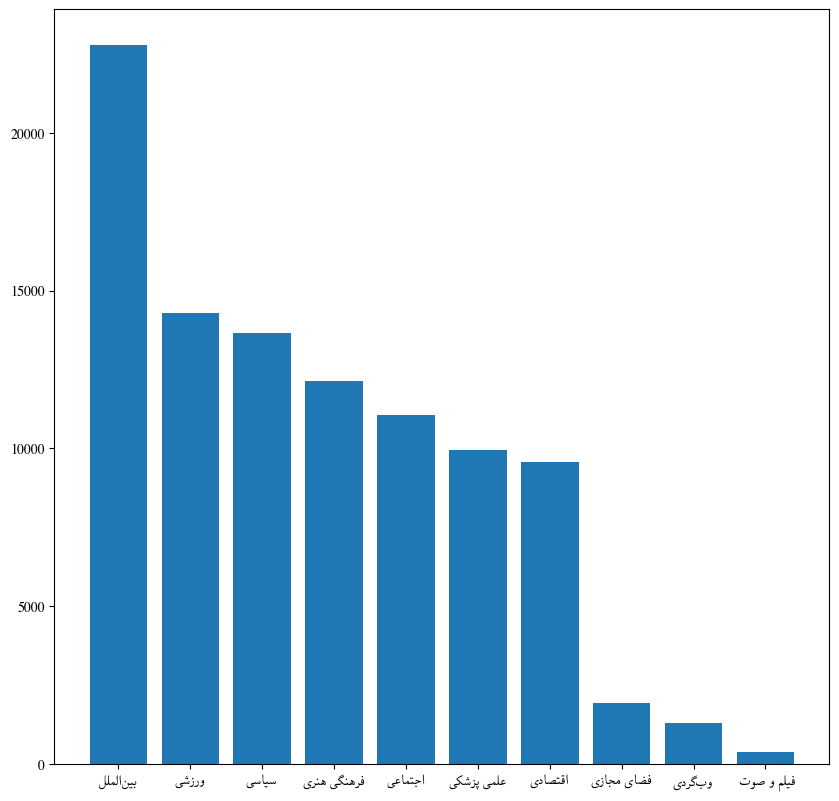

In [5]:
dp_train.plot_distribution()

In [6]:
print(dp_train.map_word_index())

20 گفت
30 بود
50 تهران


In [7]:
dp_train.tokenize(dp_train.X[0]) ## each sentence of training set is list of tokens.

[15619,
 31451,
 128583,
 785,
 2,
 35,
 88,
 91,
 1549,
 0,
 10052,
 176,
 21,
 27,
 83,
 234,
 597,
 3714,
 952,
 26871,
 2,
 110,
 3,
 140,
 357,
 15619,
 7,
 6806,
 76889,
 3823,
 8,
 6806,
 76889,
 16,
 181,
 678,
 1,
 7230,
 2557,
 90,
 6255,
 8,
 320,
 24968,
 5251,
 524,
 8,
 670,
 33,
 6189,
 15619,
 7,
 31451,
 128583,
 752,
 4,
 6189,
 3,
 13186,
 0,
 6256,
 187515,
 10236,
 1,
 4376,
 1452,
 8,
 1367,
 16,
 4,
 35,
 117,
 15619,
 5999,
 1,
 763,
 818,
 121,
 1090,
 694,
 38,
 141,
 8,
 4,
 117,
 15539,
 215,
 3,
 23,
 11443,
 3,
 3356,
 0,
 9307,
 8,
 2756,
 854,
 8,
 117,
 1489,
 15619,
 3,
 23,
 1736,
 396,
 15,
 0,
 13716,
 22131,
 404,
 19507,
 9877,
 102889,
 22369,
 13394,
 37244,
 12338,
 69384,
 0,
 12465,
 10880,
 8,
 90,
 86956,
 5328,
 498,
 1,
 763,
 1289,
 15619,
 38,
 141,
 8,
 712,
 8,
 187516,
 6218,
 878,
 946,
 8814,
 1,
 120,
 15619,
 6123,
 15619,
 2264,
 239,
 0,
 284,
 8051,
 436,
 0,
 86957,
 8,
 1374,
 5750,
 13,
 7,
 2,
 46,
 807,
 158,
 117,
 13,
 

## NaiveBayesClassifier

In [25]:
from sklearn.metrics import classification_report

class NaiveBayesClassifier:
    def __init__(self, X, y, categories):
        self.categories = categories
        self.X = X
        self.y = y
        self.count_per_class_dict = None
        self.count_allwords_per_class = None
        self.log_prior_list = None
        self.count_word_per_class()

    def count_word_per_class(self):        
        count_per_class_dict = {}
        count_allwords_per_class = {}
        prior_counts = 10*[0]
        
        for category in self.categories:
            for i in range(len(self.X)):
                if self.y[i] == category:
                    prior_counts[self.categories.index(category)] += 1
                    for token in self.X[i]:
                        if category in count_allwords_per_class:
                            count_allwords_per_class[category] += 1
                        else:
                            count_allwords_per_class[category] = 1 
                               
                        if (token, category) in count_per_class_dict:
                            count_per_class_dict[(token,category)] += 1
                        else:
                            count_per_class_dict[(token,category)] = 1

        self.count_per_class_dict = count_per_class_dict
        self.count_allwords_per_class = count_allwords_per_class
        self.log_prior_list = list(map(lambda p: np.log2(p/len(self.X)), prior_counts))
        
        unique_tokens = set()
        n_unique_tokens = 0
        for x in self.X:
            for token in x:
                if token not in unique_tokens:
                    unique_tokens.add(token)
                    n_unique_tokens += 1
        self.n_unique_tokens = n_unique_tokens            

    def calculate_word_log_prob_per_class(self, word, category):
        if (word,category) in self.count_per_class_dict:
            return np.log2((self.count_per_class_dict[word,category] + 1)/(self.count_allwords_per_class[category] + self.n_unique_tokens))
        else:
            return np.log2(1/(self.count_allwords_per_class[category] + self.n_unique_tokens))
    
    def calculate_log_prior(self):
        return self.log_prior_list
    
    def predict(self, example, evaluation=False):
        pred_category = None
        max_sum = -np.inf
        probs = []
        prior_list = self.calculate_log_prior()
        for index in range(len(self.categories)):
            sum = 0
            for token in example:
                sum += self.calculate_word_log_prob_per_class(token, self.categories[index])
            sum += prior_list[index]
            probs.append(sum)
            if sum > max_sum:
                max_sum = sum
                pred_category = index
        if not evaluation:        
            print(probs)
            print(self.categories[pred_category])

        return pred_category
    
    def evaluate(self, is_test_set=0, X_test=None, y_test=None, size=None):
        y_pred = []
        if is_test_set:
            for x in X_test:
                y_pred.append(self.predict(x, evaluation=True))       
            y_true = list(map(lambda y: self.categories.index(y), y_test))  
            print(classification_report(y_true, y_pred))
        else:
            for x in self.X:
                y_pred.append(self.predict(x, evaluation=True))
            y_true_train = list(map(lambda y: self.categories.index(y), self.y))      
            print(classification_report(y_true_train, y_pred))   


nb_classifier = NaiveBayesClassifier(dp_train.X, dp_train.y, dp_train.categories)

In [22]:
nb_classifier.predict(dp_test.X[0])

[-2494.7739239262464, -2557.0163379994938, -2479.3767429365407, -2341.1058281077694, -2445.850675206795, -2464.4051574024734, -2502.013405714409, -2443.6415882499377, -2494.8287779207094, -2787.528070022513]
فرهنگی هنری


3

In [23]:
nb_classifier.predict(dp_test.X[110])

[-1132.8819132788697, -1154.310365378377, -1091.7926648074354, -1051.8208244271102, -1088.1168179318192, -1122.2312103483744, -1144.6634057612605, -1183.2183145682227, -1177.1967423664805, -1378.266333651427]
فرهنگی هنری


3

In [19]:
nb_classifier.predict(dp_test.X[2654])

[-359.9752308087945, -365.8669782663703, -361.1029458017239, -366.0755033452172, -350.3508946529595, -355.9597666914999, -308.63532438155414, -336.25242176473256, -385.94922591927576, -391.06765699472777]
اقتصادی


6

## Evaluation

In [26]:
nb_classifier.evaluate(is_test_set=1, X_test = dp_test.X, y_test = dp_test.y)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4105
           1       0.98      0.97      0.97      2506
           2       0.82      0.82      0.82      2473
           3       0.86      0.91      0.89      2191
           4       0.81      0.79      0.80      2002
           5       0.85      0.90      0.88      1821
           6       0.86      0.83      0.85      1745
           7       0.65      0.73      0.69       339
           8       0.66      0.34      0.45       239
           9       1.00      0.01      0.03        73

    accuracy                           0.88     17494
   macro avg       0.84      0.72      0.73     17494
weighted avg       0.88      0.88      0.87     17494



In [27]:
## To evaluate the model on the training set, just call it with no input argument.
nb_classifier.evaluate()

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     22767
           1       0.98      0.98      0.98     14274
           2       0.84      0.85      0.84     13647
           3       0.90      0.93      0.91     12136
           4       0.85      0.82      0.83     11069
           5       0.88      0.91      0.89      9938
           6       0.88      0.87      0.88      9583
           7       0.69      0.75      0.72      1936
           8       0.82      0.48      0.60      1297
           9       0.71      0.03      0.06       375

    accuracy                           0.90     97022
   macro avg       0.85      0.76      0.77     97022
weighted avg       0.90      0.90      0.89     97022

